# **IMPORT PACKAGES AND DATA**

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Data
df = pd.read_csv('updated_pollution_dataset.csv')
print(df.shape)
df.head(5).T

(5000, 10)


,0,1,2,3,4
Temperature,29.8,28.3,23.1,27.1,26.5
Humidity,59.1,75.6,74.7,39.1,70.7
PM2.5,5.2,2.3,26.7,6.1,6.9
PM10,17.9,12.2,33.8,6.3,16.0
NO2,18.9,30.8,24.4,13.5,21.9
SO2,9.2,9.7,12.6,5.3,5.6
CO,1.72,1.64,1.63,1.15,1.01
Proximity_to_Industrial_Areas,6.3,6.0,5.2,11.1,12.7
Population_Density,319,611,619,551,303
Air Quality,Moderate,Moderate,Moderate,Good,Good


# **CHECK DATA**

In [ ]:
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


# **DATA VISUALIZATION**

['Moderate' 'Good' 'Hazardous' 'Poor']
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


<Axes: xlabel='Air Quality'>

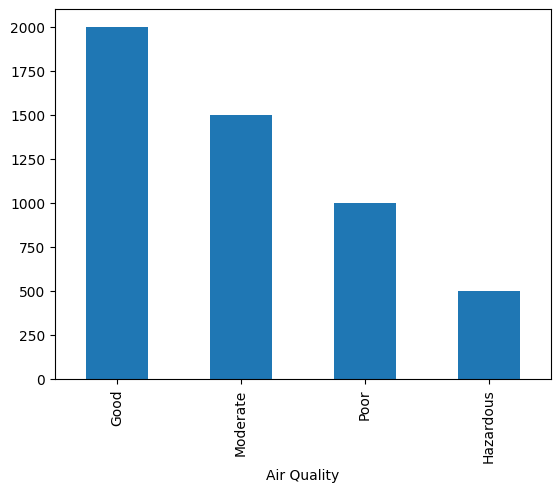

In [ ]:
print(df['Air Quality'].unique())
print(df['Air Quality'].value_counts())
df['Air Quality'].value_counts().plot.bar()

# **PREPROCESSING**

In [ ]:
X = df.drop(['Air Quality'], axis=1).values
y = df['Air Quality'].values
print(X.shape)
print(y.shape)

(5000, 9)
(5000,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(len(df['Air Quality'].value_counts()))

4


In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X.astype(float))

print(X_scaled[0])

[-0.03408041 -0.69071534 -0.60858932 -0.45045531 -0.84458126 -0.12072072
  0.40230264 -0.58865846 -1.16816284]


# **SPLIT THE DATA INTO TRAINING AND TESTING SETS**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 9)
(4000,)
(1000, 9)
(1000,)


In [ ]:
from tensorflow import keras

from keras.utils import to_categorical
y_train1 = to_categorical(y_train)
print(y_train1[:2])

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]]


# **BUILD MODEL**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In [ ]:
# Define function to build the model
def build_model(optimizer):
    model = Sequential([
        Dense(100, activation='sigmoid'),
        Dense(4, activation='softmax'),
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
    return model

In [ ]:
# List of optimizers to compare
batch_size_full = X_train.shape[0]  # Full batch size for BGD
batch_size_mini = 128  # Mini-batch size for MBGD

optimizers = {
    'Batch Gradient Descent (BGD)': lambda: SGD(),  # Default learning_rate=0.01
    'Mini-Batch Gradient Descent (MBGD)': lambda: SGD(),
    'Stochastic Gradient Descent (SGD)': lambda: SGD(),
    'Momentum': lambda: SGD(momentum=0.9),  # Default learning_rate=0.01
    'Adagrad': lambda: Adagrad(),           # Default learning_rate=0.001
    'RMSProp': lambda: RMSprop(),           # Default learning_rate=0.001
    'Adam': lambda: Adam()                  # Default learning_rate=0.001
}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Train and evaluate models with different optimizers
results = {}
epochs = 60
classification_results = {}

for name, optimizer_fn in optimizers.items():
    print(f"Training with {name} optimizer...")

    optimizer = optimizer_fn()  # Create a new optimizer instance
    model = build_model(optimizer)

    # Determine batch size
    if "Batch Gradient Descent (BGD)" in name:
        current_batch_size = batch_size_full  # Full batch for BGD
    elif name in ['Momentum', 'Adagrad', 'RMSProp', 'Adam', 'Mini-Batch Gradient Descent (MBGD)']:
        current_batch_size = batch_size_mini  # Mini-batch for MBGD and other optimizers
    elif "Stochastic Gradient Descent (SGD)" in name:
        current_batch_size = 1  # Single-sample batch for true SGD
    else:
        current_batch_size = batch_size_mini  # Default to mini-batch
    history = model.fit(
        x=X_train,
        y=y_train1,
        validation_split=0.2,
        batch_size=current_batch_size,
        epochs=epochs,
    )
    results[name] = history.history
    print(f"Completed training with {name} optimizer.")
    # Make predictions on the test set
    y_pred_prob = model.predict(X_test)  # Get probabilities
    y_pred = y_pred_prob.argmax(axis=1)

    # Evaluate predictions
    print(f"Classification report for {name} optimizer:")
    report = classification_report(y_test, y_pred, zero_division=0)
    print(report)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name} optimizer: {accuracy:.4f}")

    # Store the report and accuracy for comparison
    classification_results[name] = {
        'report': report,
        'accuracy': accuracy
    }

Training with Batch Gradient Descent (BGD) optimizer...
Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2784 - loss: 1.5902 - val_accuracy: 0.2763 - val_loss: 1.5660
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.2988 - loss: 1.5522 - val_accuracy: 0.2850 - val_loss: 1.5314
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3044 - loss: 1.5178 - val_accuracy: 0.2850 - val_loss: 1.5001
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3063 - loss: 1.4868 - val_accuracy: 0.2850 - val_loss: 1.4719
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3081 - loss: 1.4588 - val_accuracy: 0.2862 - val_loss: 1.4465
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3075 - loss: 1.4336 - val_accuracy: 0.2887 - val_loss: 1.4237
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3066 - loss: 1.4110 - val_accuracy: 0.2900 - val_loss: 1.4032
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.3069

# **EVALUATION AND COMPARE**

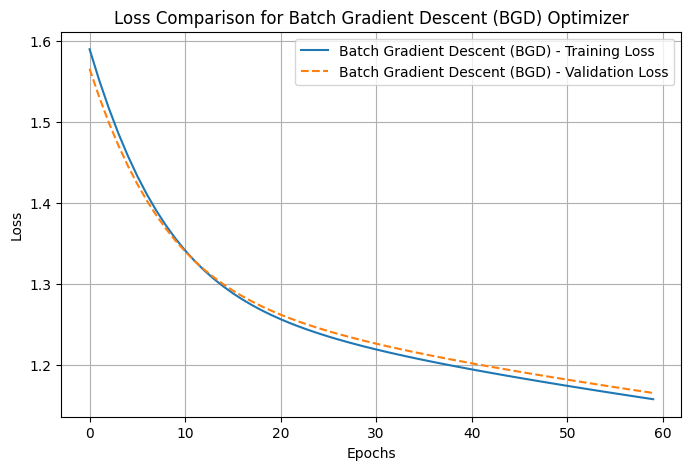

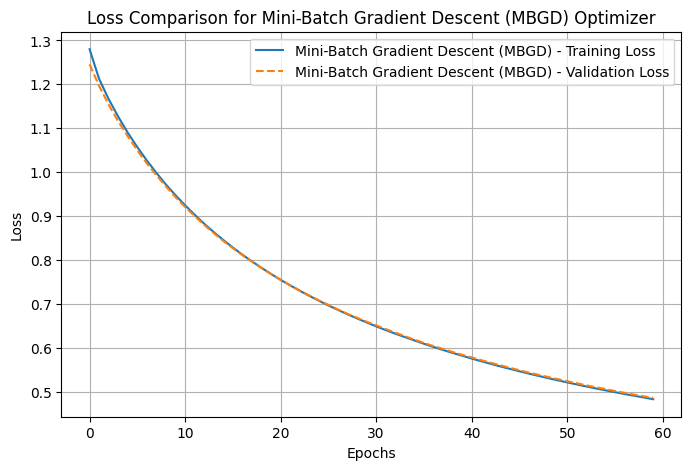

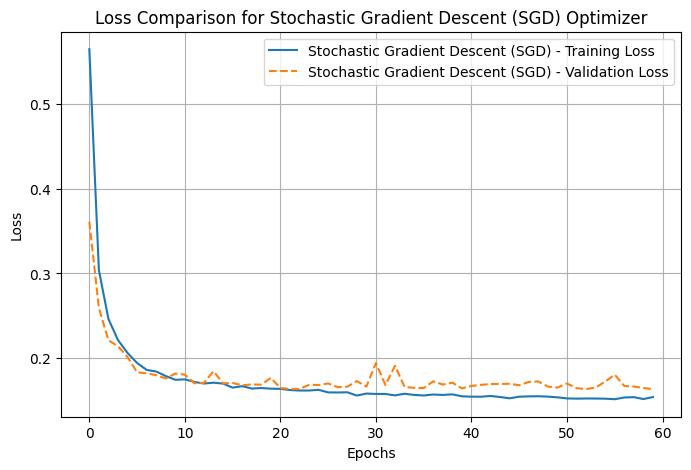

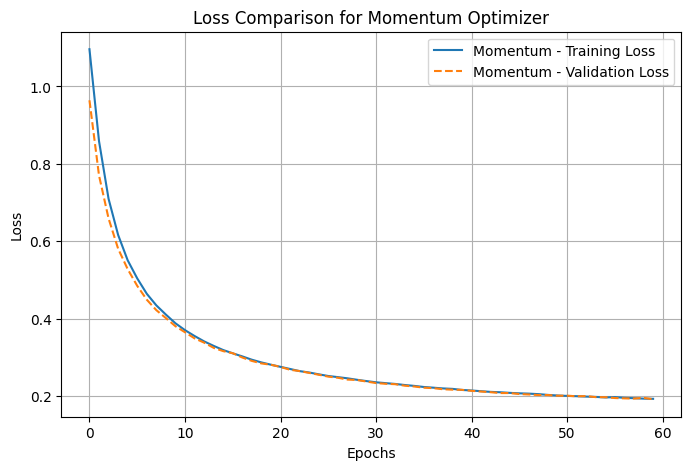

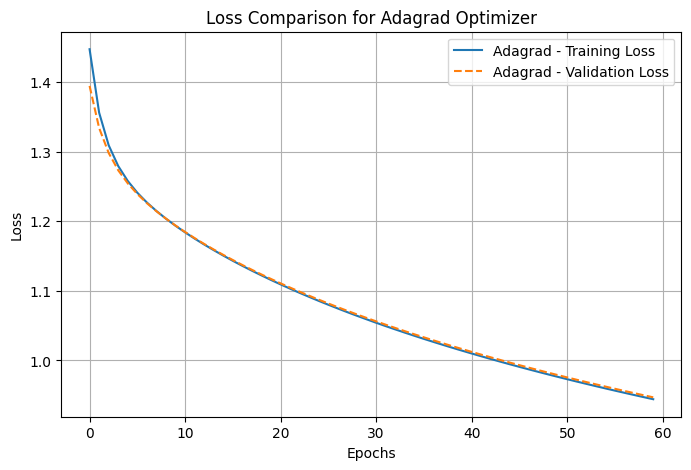

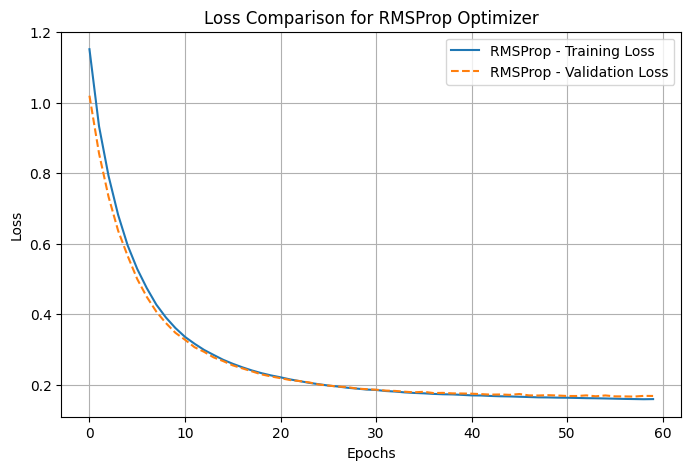

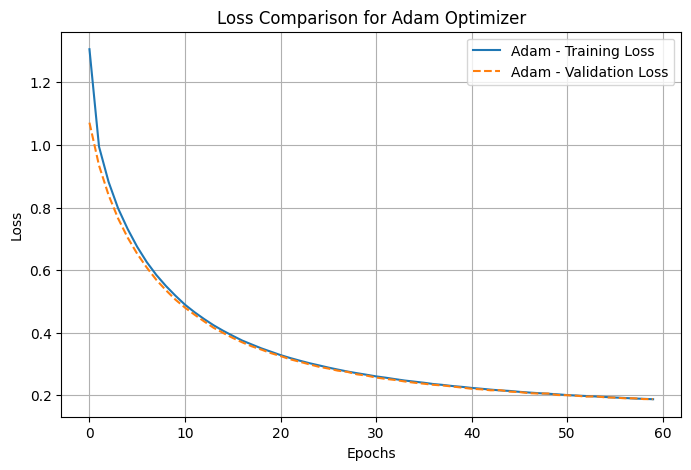

In [ ]:
# Plot the loss for each optimizer in separate plots
for name in results:
    plt.figure(figsize=(8, 5))
    plt.plot(results[name]['loss'], label=f"{name} - Training Loss")
    plt.plot(results[name]['val_loss'], label=f"{name} - Validation Loss", linestyle='dashed')
    plt.title(f'Loss Comparison for {name} Optimizer')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


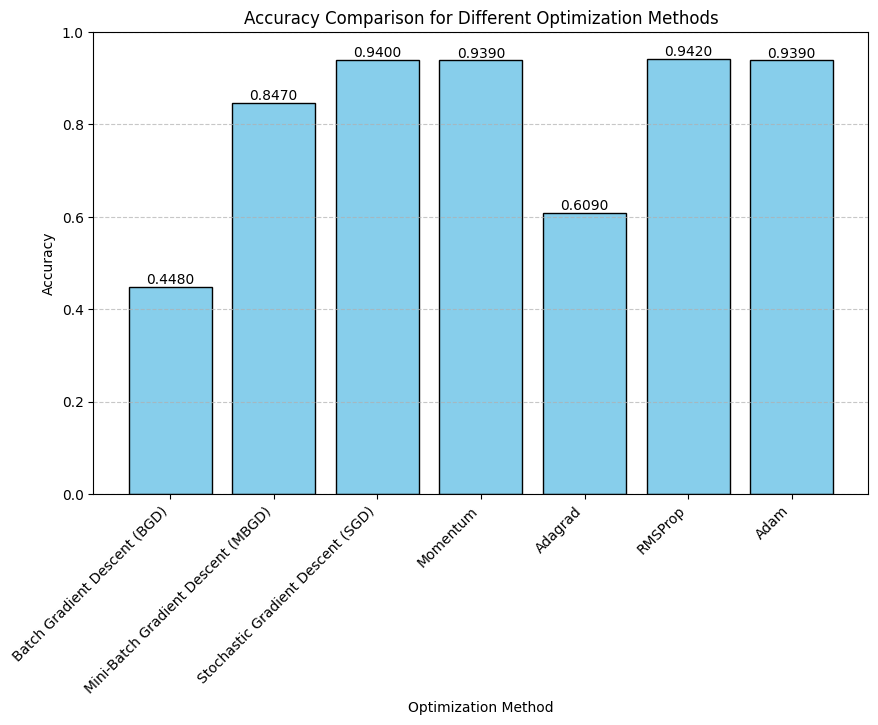

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values for bar plot
optimizer_names = list(classification_results.keys())
accuracies = [classification_results[name]['accuracy'] for name in optimizer_names]

# Plot bar chart for accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(optimizer_names, accuracies, color='skyblue', edgecolor='black')

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{accuracy:.4f}',  # Format accuracy to 4 decimal places
             ha='center', va='bottom', fontsize=10)

# Add labels, title, and grid
plt.title('Accuracy Comparison for Different Optimization Methods')
plt.xlabel('Optimization Method')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()